## First steps with Polars

In [1]:
import polars as pl

In [2]:
!du -sh data/01_raw/*

1.8G	data/01_raw/Questions.csv
 62M	data/01_raw/Tags.csv


In [3]:
df = pl.read_csv("data/01_raw/Questions.csv", encoding="utf8-lossy")
df.head()

Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
i64,str,str,str,i64,str,str
80,"""26""","""2008-08-01T13:…","""NA""",26,"""SQLStatement.e…","""<p>I've writte…"
90,"""58""","""2008-08-01T14:…","""2012-12-26T03:…",144,"""Good branching…","""<p>Are there a…"
120,"""83""","""2008-08-01T15:…","""NA""",21,"""ASP.NET Site M…","""<p>Has anyone …"
180,"""2089740""","""2008-08-01T18:…","""NA""",53,"""Function for c…","""<p>This is som…"
260,"""91""","""2008-08-01T23:…","""NA""",49,"""Adding scripti…","""<p>I have a li…"


In [4]:
tags = pl.read_csv("data/01_raw/Tags.csv")
tags.head()

Id,Tag
i64,str
80,"""flex"""
80,"""actionscript-3…"
80,"""air"""
90,"""svn"""
90,"""tortoisesvn"""


In [5]:
type(df)

polars.dataframe.frame.DataFrame

In [6]:
len(df), len(tags)

(1264216, 3750994)

In [7]:
df.dtypes

[Int64, Utf8, Utf8, Utf8, Int64, Utf8, Utf8]

In [8]:
print(f"Estimated size: {df.estimated_size() >> 20} MiB")

Estimated size: 1866 MiB


In [9]:
print(df.head(3))

shape: (3, 7)
┌─────┬─────────────┬─────────────────┬─────────────────┬───────┬─────────────────┬────────────────┐
│ Id  ┆ OwnerUserId ┆ CreationDate    ┆ ClosedDate      ┆ Score ┆ Title           ┆ Body           │
│ --- ┆ ---         ┆ ---             ┆ ---             ┆ ---   ┆ ---             ┆ ---            │
│ i64 ┆ str         ┆ str             ┆ str             ┆ i64   ┆ str             ┆ str            │
╞═════╪═════════════╪═════════════════╪═════════════════╪═══════╪═════════════════╪════════════════╡
│ 80  ┆ 26          ┆ 2008-08-01T13:5 ┆ NA              ┆ 26    ┆ SQLStatement.ex ┆ <p>I've        │
│     ┆             ┆ 7:07Z           ┆                 ┆       ┆ ecute() -       ┆ written a      │
│     ┆             ┆                 ┆                 ┆       ┆ multipl…        ┆ database       │
│     ┆             ┆                 ┆                 ┆       ┆                 ┆ gener…         │
│ 90  ┆ 58          ┆ 2008-08-01T14:4 ┆ 2012-12-26T03:4 ┆ 144   ┆ Good branch

In [10]:
df.describe()

describe,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
str,f64,str,str,str,f64,str,str
"""count""",1.264216e6,"""1264216""","""1264216""","""1264216""",1.264216e6,"""1264216""","""1264216"""
"""null_count""",0.0,"""0""","""0""","""0""",0.0,"""0""","""0"""
"""mean""",2.1327e7,null,null,null,1.781537,null,null
"""std""",1.1514e7,null,null,null,13.663886,null,null
"""min""",80.0,"""1""","""2008-08-01T13:…","""2008-09-24T19:…",-73.0,""" java.lang.…",""" <h1>Backgrou…"
"""max""",4.014338e7,"""NA""","""2016-10-19T23:…","""NA""",5190.0,"""￼-bash: babel-…","""When user writ…"
"""median""",2.1725415e7,null,null,null,0.0,null,null
"""25%""",1.142599e7,null,null,null,0.0,null,null
"""75%""",3.154543e7,null,null,null,1.0,null,null


In [11]:
tags["Tag"].value_counts().sort("counts", descending=True).head()

Tag,counts
str,u32
"""javascript""",124155
"""java""",115212
"""c#""",101186
"""php""",98808
"""android""",90659


## Expressions as chained operations on columns

In [12]:
(
    pl.col("Score")
    .median()
)

In [13]:
print(df.select(pl.col("Score").mean()))

shape: (1, 1)
┌──────────┐
│ Score    │
│ ---      │
│ f64      │
╞══════════╡
│ 1.781537 │
└──────────┘


In [14]:
print(df.select([
    pl.col("Id").n_unique().alias("num_unique_users"),
    pl.col("Score").mean().alias("mean_score"),
    pl.col("Title").str.lengths().max().alias("max_title_length"),
    # pl.col(pl.Utf8).str.lengths().max().suffix("_max_length"),
]))

shape: (1, 3)
┌──────────────────┬────────────┬──────────────────┐
│ num_unique_users ┆ mean_score ┆ max_title_length │
│ ---              ┆ ---        ┆ ---              │
│ u32              ┆ f64        ┆ u32              │
╞══════════════════╪════════════╪══════════════════╡
│ 1264216          ┆ 1.781537   ┆ 204              │
└──────────────────┴────────────┴──────────────────┘


In [15]:
pl.col("Tag").arr.lengths()

### The power of laziness

In [16]:
# Don't try this at home unless you have enough RAM!
# (
#     df
#     .join(tags, on="Id")
#     .filter(pl.col("Tag").str.to_lowercase().str.contains("python"))
#     .sort("Id")
# )

In [17]:
q_python = (
    df.lazy()  # Notice the .lazy() call
    # The input of a lazy join needs to be lazy
    # We use a 'semi' join, like 'inner' but discarding extra columns
    .join(tags.lazy(), on="Id", how="semi")
    .filter(pl.col("Tag").str.to_lowercase().str.contains("python"))
    .sort("Id")
).collect()  # Call .collect() at the end
print(q_python.head(3))

shape: (3, 7)
┌───────┬─────────────┬──────────────────┬────────────┬───────┬──────────────────┬─────────────────┐
│ Id    ┆ OwnerUserId ┆ CreationDate     ┆ ClosedDate ┆ Score ┆ Title            ┆ Body            │
│ ---   ┆ ---         ┆ ---              ┆ ---        ┆ ---   ┆ ---              ┆ ---             │
│ i64   ┆ str         ┆ str              ┆ str        ┆ i64   ┆ str              ┆ str             │
╞═══════╪═════════════╪══════════════════╪════════════╪═══════╪══════════════════╪═════════════════╡
│ 11060 ┆ 912         ┆ 2008-08-14T13:59 ┆ NA         ┆ 18    ┆ How should I     ┆ <p>This is a    │
│       ┆             ┆ :21Z             ┆            ┆       ┆ unit test a      ┆ difficult and   │
│       ┆             ┆                  ┆            ┆       ┆ code-ge…         ┆ open-…          │
│ 17250 ┆ 394         ┆ 2008-08-20T00:16 ┆ NA         ┆ 24    ┆ Create an        ┆ <p>I'm creating │
│       ┆             ┆ :40Z             ┆            ┆       ┆ encrypted ZIP

<div class="alert alert-warning">If your computer has low RAM, avoid loading the Questions dataset twice: restart the kernel now!</div>

In [1]:
import polars as pl

In [2]:
tags = pl.read_csv("data/01_raw/Tags.csv")

In [3]:
plan = (
    # scan_csv returns a lazy dataframe already
    pl.scan_csv("data/01_raw/Questions.csv", encoding="utf8-lossy")
    .join(tags.lazy(), on="Id", how="semi")
    .filter(pl.col("Tag").str.to_lowercase().str.contains("python"))
    .sort("Score", descending=True)
    .limit(1_000)
)
top_voted_python_qs = plan.collect()

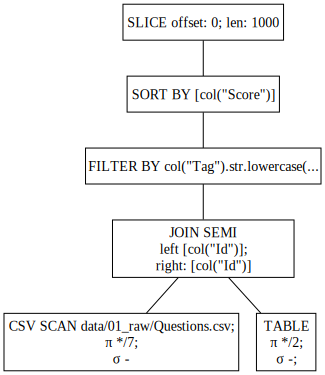

In [4]:
plan.show_graph(optimized=False)

### Working with columns of lists

In [5]:
tag_list_lazy = (
    tags.lazy()
    .groupby("Id").agg(
        pl.col("Tag")
        .alias("TagList")
    )
)
print(tag_list_lazy.limit(5).collect())

shape: (5, 2)
┌──────────┬───────────────────────────────────┐
│ Id       ┆ TagList                           │
│ ---      ┆ ---                               │
│ i64      ┆ list[str]                         │
╞══════════╪═══════════════════════════════════╡
│ 17467640 ┆ ["php", "jquery", … "jquery-mobi… │
│ 5293920  ┆ ["ckeditor"]                      │
│ 24606760 ┆ ["php", "mysql", … "database"]    │
│ 32842200 ┆ ["java", "treeview", … "eclipse-… │
│ 38673920 ┆ ["visualsvn-server"]              │
└──────────┴───────────────────────────────────┘


In [6]:
tag_list_extended_lazy = tag_list_lazy.with_columns(
    pl.col("TagList")
    .arr.eval(
        pl.element()
        .str.to_lowercase()
        .str.contains("python")
        .any()
    ).flatten().alias("ContainsPython")
)
tag_list_extended_lazy.sort("Id", descending=True).limit(10).collect()

Id,TagList,ContainsPython
i64,list[str],bool
40143380,"[""npm"", ""mocha"", ""babel""]",false
40143360,"[""javascript"", ""vue.js""]",false
40143340,"[""android"", ""android-studio""]",false
40143300,"[""google-bigquery""]",false
40143210,"[""php"", "".htaccess""]",false
40143190,"[""python"", ""bash"", ""multiline""]",true
40143170,"[""laravel"", ""binding"", … ""routes""]",false
40143150,"[""javascript"", ""youtube"", ""youtube-iframe-api""]",false
40143140,"[""spring-data-rest""]",false


In [7]:
top_python_questions = (
    pl.scan_csv("./data/01_raw/Questions.csv", encoding="utf8-lossy")
    .join(tag_list_extended_lazy, on="Id")
    .filter(pl.col("ContainsPython"))
    .top_k(1000, by="Score")
).collect()

In [8]:
pl.Config.set_fmt_str_lengths(100)

polars.config.Config

In [9]:
top_python_questions.select(pl.col("CreationDate", "Score", "Title")).head(10)

CreationDate,Score,Title
str,i64,str
"""2008-11-20T18:42:21Z""",824,"""How do I randomly select an item from a list using Python?"""
"""2010-01-12T21:07:40Z""",797,"""Manually raising (throwing) an exception in Python"""
"""2009-02-12T14:11:50Z""",599,"""Extracting extension from filename in Python"""
"""2008-09-30T11:00:10Z""",588,"""What's the canonical way to check for type in python?"""
"""2009-10-07T21:11:22Z""",501,"""Use different Python version with virtualenv"""
"""2008-11-19T20:15:38Z""",484,"""How do I remove/delete a folder that is not empty with Python?"""
"""2011-05-28T05:44:53Z""",481,"""Correct way to write line to file in Python"""
"""2009-08-24T16:30:15Z""",474,"""'has_key()' or 'in'?"""
"""2015-05-13T13:16:22Z""",472,"""Why is [] faster than list()?"""
